# Activity 3.06: Creating a Scatter Plot with Marginal Histograms

In this activity, we will make use of GridSpec to visualize a scatter plot with marginal histograms. Let's look at the following scenario: you are given a dataset containing information about various animals. Visualize the correlation between the various animal attributes using scatter plots and marginal histograms.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('../../Datasets/anage_data.csv')
df

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,4214,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,...,NaN,15000.00,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN
4214,4215,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,...,NaN,5062.00,wild,medium,acceptable,NaN,999.00,NaN,NaN,NaN
4215,4216,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,...,NaN,0.04,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN
4216,4217,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,...,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN


Filter the data so that you end up with samples containing a body mass and maximum longevity as the given dataset, AnAge, which was used in the previous exercise, is not complete. Select all of the samples of the Aves class with a body mass of less than 20,000.

In [8]:
data = df[['Class', 'Maximum longevity (yrs)', 'Body mass (g)']]
data = data[data.Class == 'Aves']
data = data.dropna()
data = data[data['Body mass (g)'] < 20000]
data

,Class,Maximum longevity (yrs),Body mass (g)
184,Aves,20.2,135.0
189,Aves,48.0,3000.0
199,Aves,22.4,658.0
214,Aves,42.0,2860.0
232,Aves,29.0,652.0
...,...,...,...
1342,Aves,14.0,45.9
1348,Aves,25.0,571.0
1354,Aves,16.4,1040.0
1361,Aves,22.5,1330.0


Create a Figure with a constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a Figure title.

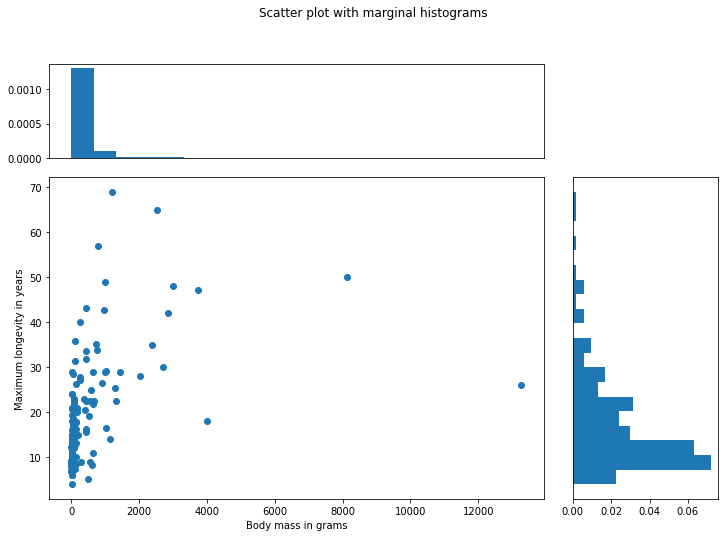

In [28]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)

gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0,:3])
ax2 = fig.add_subplot(gs[1:,:3])
ax3 = fig.add_subplot(gs[1:,3])

ax1.hist(data['Body mass (g)'], bins=20, density=True)
ax2.scatter(data['Body mass (g)'], data['Maximum longevity (yrs)'])
ax3.hist(data['Maximum longevity (yrs)'], bins=20, density=True, orientation='horizontal')

# title
fig.suptitle("Scatter plot with marginal histograms")
# add labels
ax2.set_xlabel("Body mass in grams")
ax2.set_ylabel("Maximum longevity in years")
# remove tick labels from histograms
ax1.set_xticks([])
ax3.set_yticks([])

plt.show()